In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import numpy as np
import re

In [2]:
table = pd.read_csv(r'D:\Datasets\Golf\table.csv',index_col=0)
down_the_line_view = table.query('view =="down-the-line"')['id']
root = pathlib.Path(r'D:\Datasets\Golf\Images\Address')

image_paths = list(root.joinpath(str(i)).with_suffix('.jpg') for i in down_the_line_view)

In [3]:
hog = cv2.HOGDescriptor((48,96),(16,16),(8,8),(8,8),9)
hog.setSVMDetector(cv2.HOGDescriptor_getDaimlerPeopleDetector())

In [4]:
def non_max_suppression(boxes, probs=None, overlapThresh=0.3):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []

	# if the bounding boxes are integers, convert them to floats -- this
	# is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")

	# initialize the list of picked indexes
	pick = []

	# grab the coordinates of the bounding boxes
	x1 = boxes[:, 0]
	y1 = boxes[:, 1]
	x2 = boxes[:, 2] + boxes[:, 0]
	y2 = boxes[:, 3] + boxes[:, 1]

	# compute the area of the bounding boxes and grab the indexes to sort
	# (in the case that no probabilities are provided, simply sort on the
	# bottom-left y-coordinate)
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = y2

	# if probabilities are provided, sort on them instead
	if probs is not None:
		idxs = probs
	# sort the indexes
	idxs = np.argsort(idxs)

	# keep looping while some indexes still remain in the indexes list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the index value
		# to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)

		# find the largest (x, y) coordinates for the start of the bounding
		# box and the smallest (x, y) coordinates for the end of the bounding
		# box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])

		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)

		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]

		# delete all indexes from the index list that have overlap greater
		# than the provided overlap threshold
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))

	# return only the bounding boxes that were picked
	return boxes[pick].astype("int")

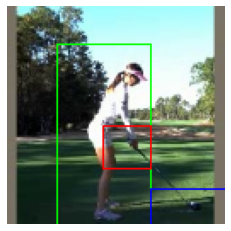

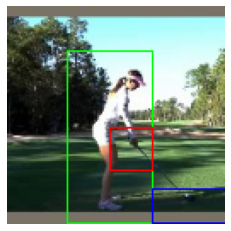

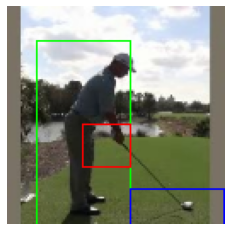

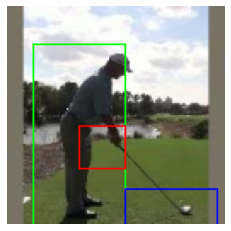

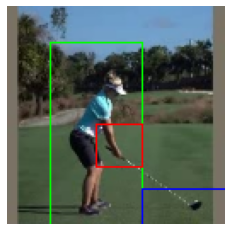

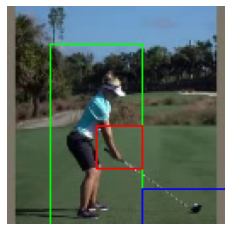

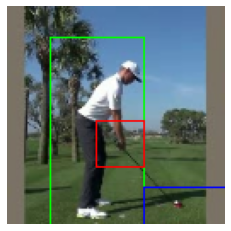

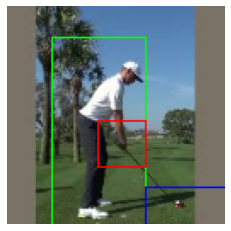

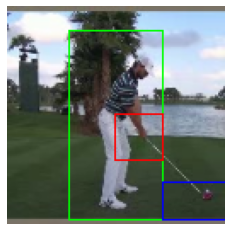

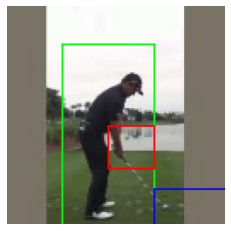

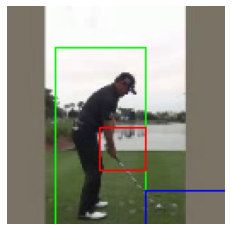

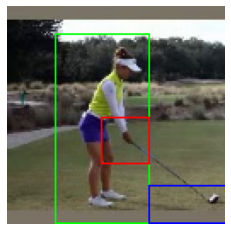

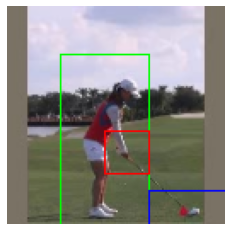

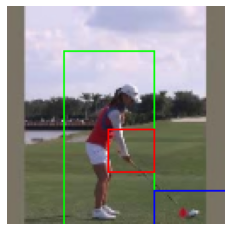

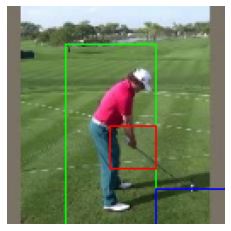

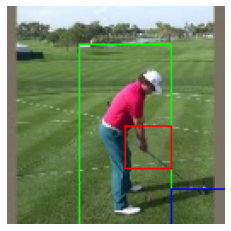

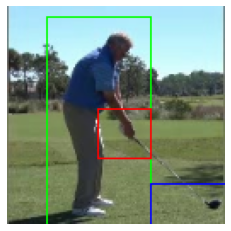

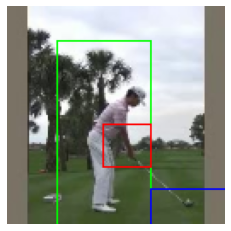

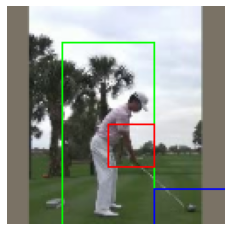

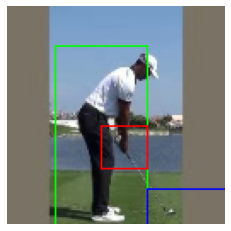

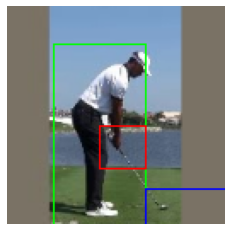

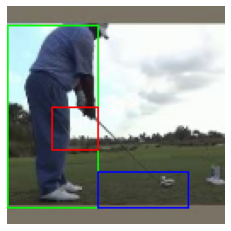

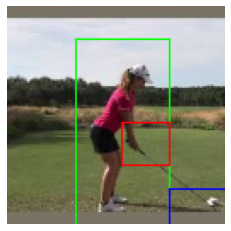

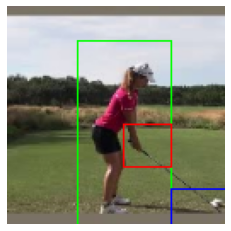

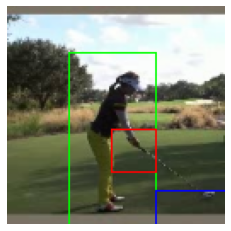

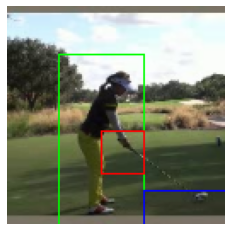

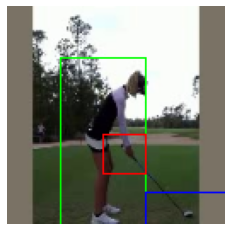

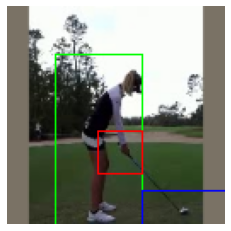

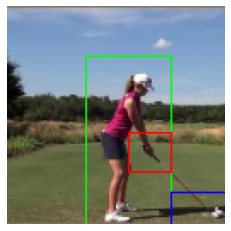

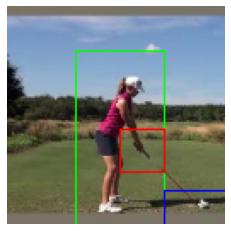

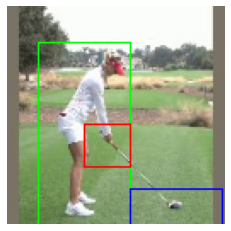

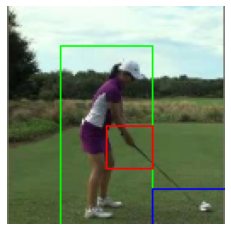

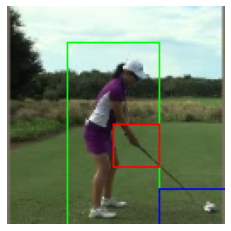

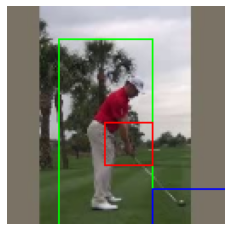

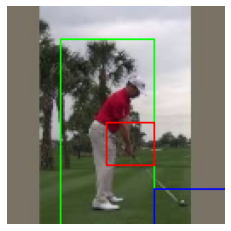

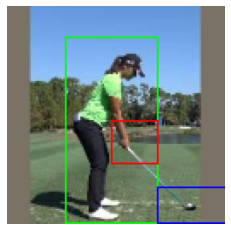

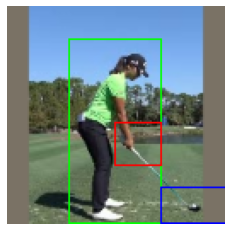

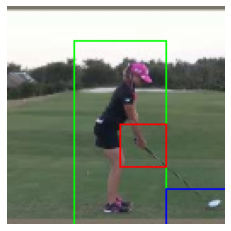

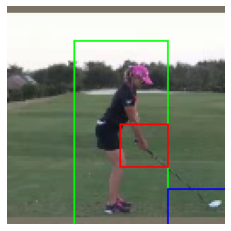

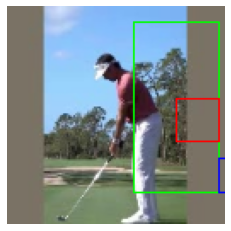

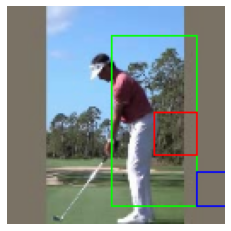

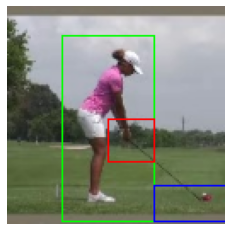

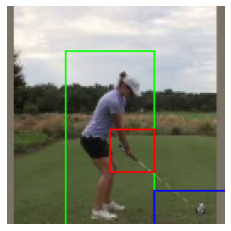

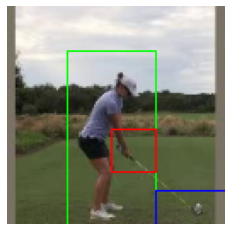

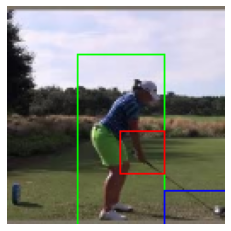

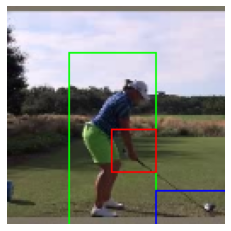

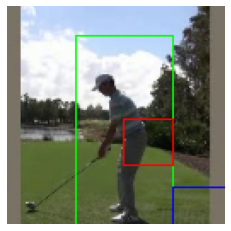

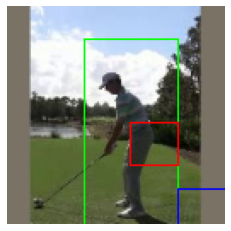

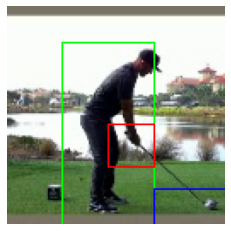

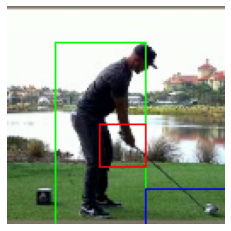

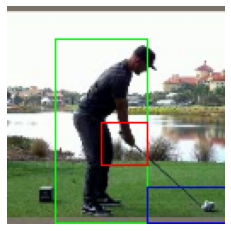

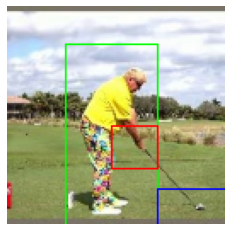

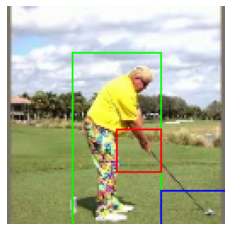

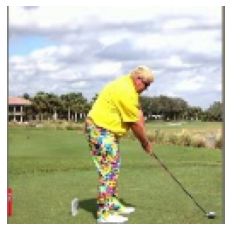

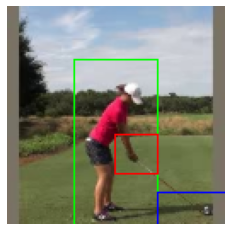

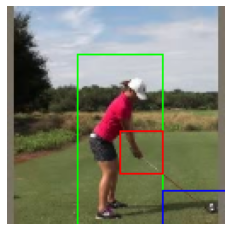

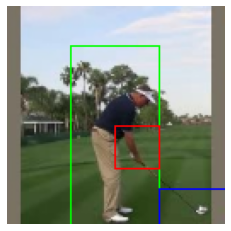

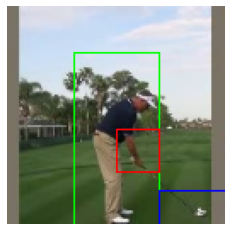

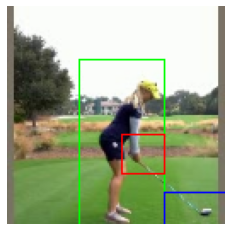

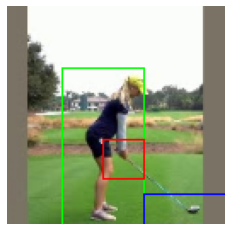

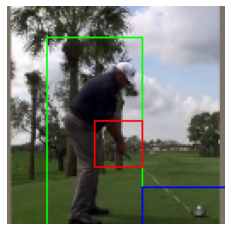

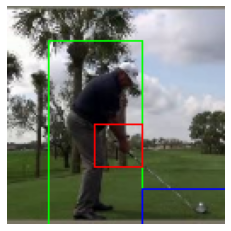

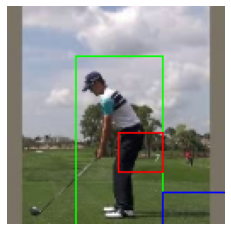

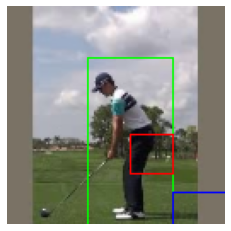

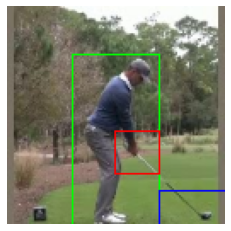

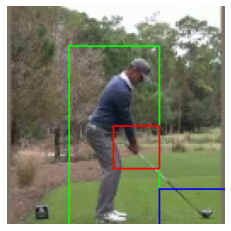

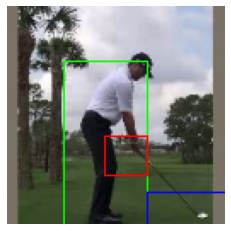

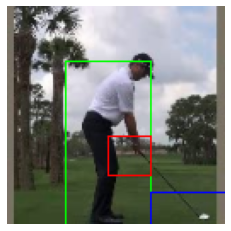

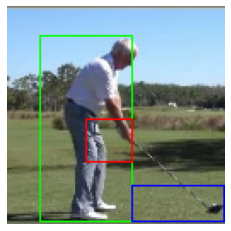

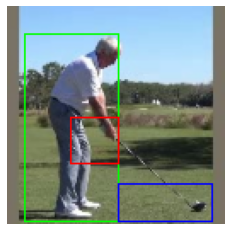

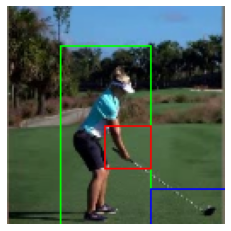

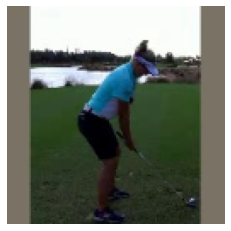

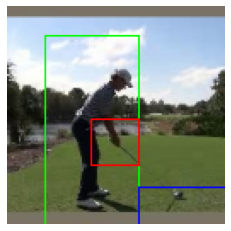

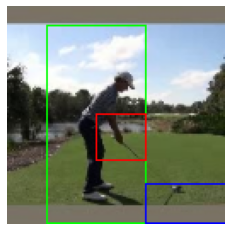

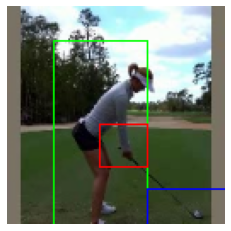

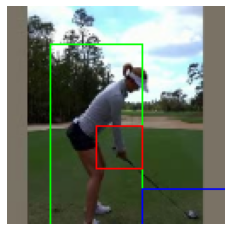

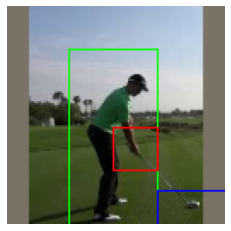

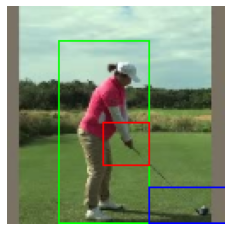

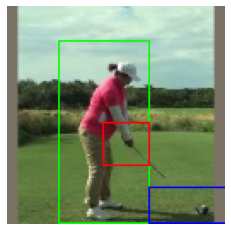

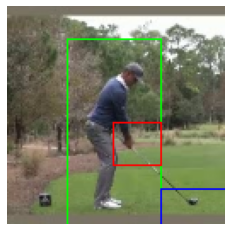

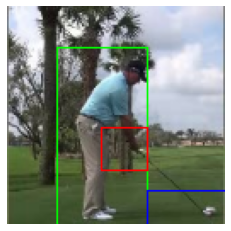

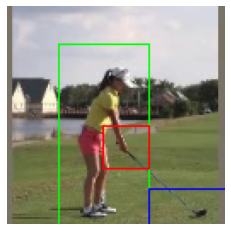

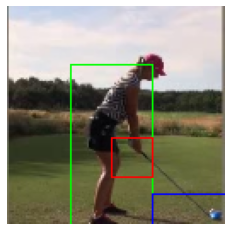

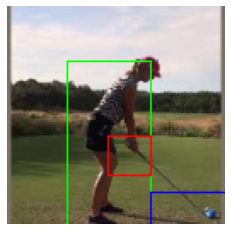

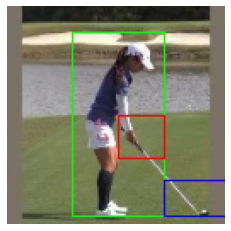

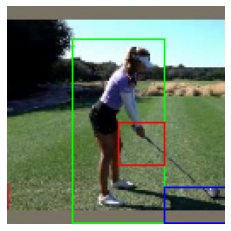

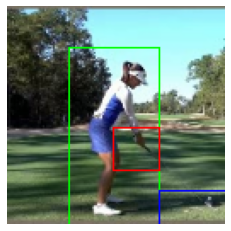

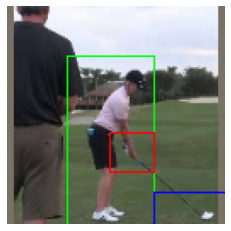

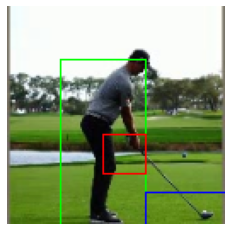

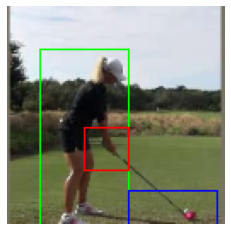

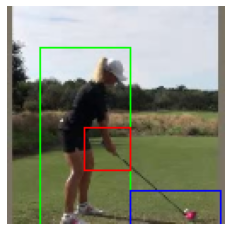

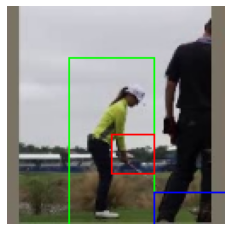

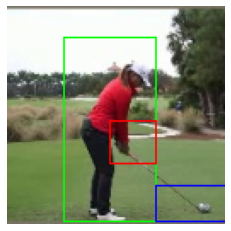

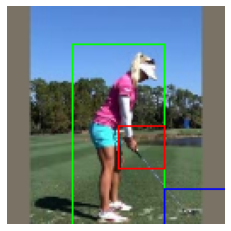

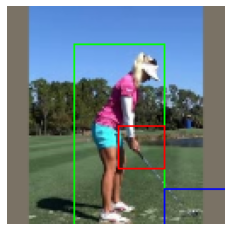

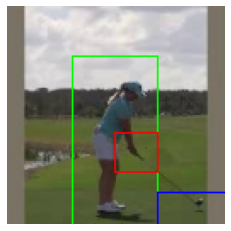

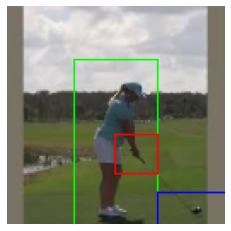

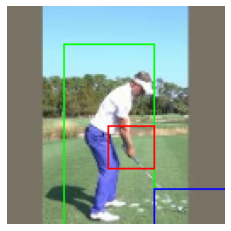

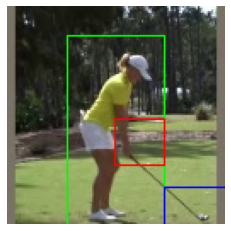

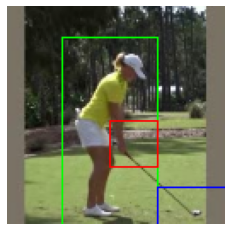

In [6]:
winStride=(4,4)
padding = (1,1)
meanShift = False
scale = 1.05

for i in range(100):
    image = cv2.imread(image_paths[i].as_posix())
    image = cv2.resize(image,(128,128))
    (rects, weights) = hog.detectMultiScale(image,winStride=winStride,padding=padding,useMeanshiftGrouping=meanShift,scale=scale)
    if len(rects) != 0:
        pick = non_max_suppression(rects,weights.squeeze(),0.05)
        for x,y,w,h in pick:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),1)
            cv2.rectangle(image,(x+w//2,y+h//2-h//10+5),(x+w,y+h//2+h//10+10),(0,0,255),1)
            cv2.rectangle(image,(x+w,y+h-h//5),(x+2*w,y+h),(255,0,0),1)
        
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.axis(False)
    plt.show()